In [1]:
import os
import sys
import numpy as np
import time
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib
import matplotlib.pyplot as plt 

plt.style.use('~/evanstyle.mplstyle')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

## Dictionary of datasets on LLNL. Checks if they exist and how many files
### Note, the integer index of this dictionary matches the row number in the google-spreadsheet log
##### https://docs.google.com/spreadsheets/d/14KmVPS824ExjVpss9H6fMSNVhopGtHVclZNsw5kKLr8/edit?usp=sharing
##### Save this sheet to your own drive!

In [2]:
datatopdir_r1 = "/p/lustre1/angelico/hv-test-chamber/Run1/"
datasets_r1 = {2:"1-29-21/pmt-trig-filling-1800/", \
                3:"1-29-21/pmt-trig-filling-1920/",\
                4:"1-30-21/anode-crosstrig-1300/",\
                6:"1-30-21/ignition-1500/",\
                7:"1-30-21/ignition-10k-1520/",\
                8:"1-31-21/glitch-1520/",\
                9:"2-1-21/anode-100/",\
                10:"2-1-21/anode-1340/",\
                11:"2-1-21/glitch-1530/",\
                12:"2-1-21/glitch-2230/",\
                13:"2-2-21/anode-1030/",\
                14:"2-2-21/corona-1300/",\
                15:"2-2-21/glitch-1320/",\
                16:"2-2-21/glitch-1430/",\
                17:"2-2-21/anode-1720/",\
                18:"2-3-21/glitch-1040/",\
                19:"2-3-21/anode-1050/",\
                20:"2-3-21/glitch-1810/",\
                21:"2-3-21/anode-1820/"}

#check that the datasets are indexible
print("Checking for datasets in top directory: " + datatopdir_r1)
to_remove = [] #list of keys to remove due to not existing
for dno in datasets_r1:
    print(str(dno)+": " + datasets_r1[dno] + "\t\t", end = '')
    isdir = os.path.isdir(datatopdir_r1+datasets_r1[dno]+"/")
    if(isdir):
        numfiles = len([_ for _ in os.listdir(datatopdir_r1+datasets_r1[dno]+"/")])
        print("True, with " + str(numfiles) + " files", end= ' ')
        #check whether the reduced/raw directories exist
        red_dir = datatopdir_r1+datasets_r1[dno]+"/"+"reduced/"
        raw_dir = datatopdir_r1+datasets_r1[dno]+"/"+"rawhdf/"
        if(os.path.isdir(red_dir)):
            #event number processed is in the filename, get the highest one. 
            redfiles = [_ for _ in os.listdir(red_dir)]
            red_evtnum = [int(_.split('.')[0]) for _ in redfiles]
            if(len(red_evtnum) != 0):
                print(", has " + str(max(red_evtnum)) + " events reduced", end= ' ')
        if(os.path.isdir(raw_dir)):
            rawfiles = [_ for _ in os.listdir(raw_dir)]
            raw_evtnum = [int(_.split('.')[0]) for _ in rawfiles]
            if(len(raw_evtnum) != 0):
                print(", has " + str(max(raw_evtnum)) + " events raw", end= ' ')
        print("\n", end=' ')
    else:
        print("False")
        to_remove.append(dno)
        

for k in to_remove:
    del datasets_r1[k]
    

datatopdir_r2 = "/p/lustre1/angelico/hv-test-chamber/Run2/"
datasets_r2 = {26:"2-22-2021/cosmics-1800/",\
              27:"2-23-2021/glitch-1150/",\
              28:"2-23-2021/anode-1240/",\
              29:"2-23-2021/pmts-1240/",\
              30:"2-23-2021/cosmics-1430/",\
              31:"2-23-2021/glitch-2000/",\
              32:"2-24-2021/glitch-1140/",\
              33:"2-24-2021/glitch-1215/",\
              34:"2-24-2021/glitch-1425/",\
              35:"2-24-2021/anode-1730/",\
              36:"2-25-2021/anode-1030/",\
              37:"2-26-2021/anode-1430/"}

#check that the datasets are indexible
print("Checking for datasets in top directory: " + datatopdir_r2)
to_remove = [] #list of keys to remove due to not existing
for dno in datasets_r2:
    print(str(dno)+": " + datasets_r2[dno] + "\t\t", end = '')
    isdir = os.path.isdir(datatopdir_r2+datasets_r2[dno]+"/")
    if(isdir):
        numfiles = len([_ for _ in os.listdir(datatopdir_r2+datasets_r2[dno]+"/")])
        print("True, with " + str(numfiles) + " files", end= ' ')
        #check whether the reduced/raw directories exist
        red_dir = datatopdir_r2+datasets_r2[dno]+"/"+"reduced/"
        raw_dir = datatopdir_r2+datasets_r2[dno]+"/"+"rawhdr/"
        if(os.path.isdir(red_dir)):
            #event number processed is in the filename, get the highest one. 
            redfiles = [_ for _ in os.listdir(red_dir)]
            red_evtnum = [int(_.split('.')[0]) for _ in redfiles]
            if(len(red_evtnum) != 0):
                print(", has " + str(max(red_evtnum)) + " events reduced", end= ' ')
        if(os.path.isdir(raw_dir)):
            rawfiles = [_ for _ in os.listdir(raw_dir)]
            raw_evtnum = [int(_.split('.')[0]) for _ in rawfiles]
            if(len(raw_evtnum) != 0):
                print(", has " + str(max(raw_evtnum)) + " events raw", end= ' ')
        print("\n", end=' ')
    else:
        print("False")
        to_remove.append(dno)
        

for k in to_remove:
    del datasets_r2[k]
    

Checking for datasets in top directory: /p/lustre1/angelico/hv-test-chamber/Run1/
2: 1-29-21/pmt-trig-filling-1800/		True, with 3021 files , has 2653 events reduced , has 2653 events raw 
 3: 1-29-21/pmt-trig-filling-1920/		True, with 81720 files , has 9982 events reduced , has 9982 events raw 
 4: 1-30-21/anode-crosstrig-1300/		True, with 163 files , has 80 events reduced , has 80 events raw 
 6: 1-30-21/ignition-1500/		True, with 3797 files , has 1976 events reduced , has 1976 events raw 
 7: 1-30-21/ignition-10k-1520/		True, with 10851 files , has 5799 events reduced , has 5799 events raw 
 8: 1-31-21/glitch-1520/		True, with 10400 files , has 5204 events reduced , has 5204 events raw 
 9: 2-1-21/anode-100/		True, with 15630 files , has 7847 events reduced , has 7847 events raw 
 10: 2-1-21/anode-1340/		True, with 210 files , has 104 events reduced , has 104 events raw 
 11: 2-1-21/glitch-1530/		True, with 5335 files , has 2674 events reduced , has 2674 events raw 
 12: 2-1-21/glitc

## Utility functions for parsing file names

In [3]:

def parse_timestamp_from_filename(infile):
    #infile looks like /path/to/data/file/pmt15.23.43.132.csv (hour, minute, second, milli)
    t = infile.split('/')[-1].split('.')[:-1]
    t[0] = t[0][-2:] #hour is always only two digits, this line just ignores file prefix 
    t = [int(_) for _ in t]
    #now is in form [hours, minutes, seconds, millis]
    milliseconds = t[3] + 1e3*t[2] + 1e3*60*t[1] + 1e3*60*60*t[0]
    return milliseconds

#looks at the input directory (a dataset) and
#finds all .csv files, separating them by file prefix
def get_separated_file_lists(indir, file_prefixes, nevents=None):
    #full list of .csv files
    file_list = []
    if(nevents is not None):
        for i, f in enumerate(os.listdir(indir)):
            if(i > nevents):
                break
            if(os.path.isfile(os.path.join(indir, f)) \
                 and f.endswith('.csv')):
                file_list.append(f)
    else:
        file_list = [f for f in os.listdir(indir) if os.path.isfile(os.path.join(indir, f)) \
                 and f.endswith('.csv')]
    
    separate_file_lists = {}
    for pref in file_prefixes:
        #selects filenames by prefix. so separate_file_lists['pmt'] = ['pmt14.53.24.449', 'pmt10.34....', ...]
        separate_file_lists[pref] = list(filter(lambda x: x[:len(pref)] == pref, file_list))  
    
    return separate_file_lists

#converts the dictionary of separated file lists into
#a dictionary of separated timestamps (units milliseconds)
def get_separated_timestamps(separated_file_lists):
    separated_timestamps = {}
    for pref in separated_file_lists:
        separated_timestamps[pref] = [parse_timestamp_from_filename(f) for f\
                                      in separated_file_lists[pref]]
       
        #sort both the timestamps lists and the filelists
        #simultaneously by the timestamps
        separated_timestamps[pref], separated_file_lists[pref] = \
        (list(t) for t in zip(*sorted(zip(separated_timestamps[pref], separated_file_lists[pref]))))
    
    return separated_timestamps, separated_file_lists

def get_sampling_period_from_file(infile):
    #parse header for the timestep
    f = open(infile, 'r', errors='ignore')
    ls = f.readlines()
    raw_sample_rate = ls[4]
    raw_sample_rate = raw_sample_rate.split(' ')[-1]
    raw_sample_rate = float(raw_sample_rate.split('H')[0])
    return (1.0/raw_sample_rate)*1e9 #nanoseconds


## PSD calculating functions

In [4]:
from scipy import signal

#input dt in nanoseconds
#frequencies come out in kHz
#psd comes out mV^2/sqrt(kHz)
def get_single_psd_welch(sig, dt):
    samp_freq = (1.0/dt)*(1e6) #First in GHz, then 1e6 brings to kHz
    #freqs output is in kHz, psd is in V^2/sqrt(kHz)
    freqs, psd = signal.welch(sig, samp_freq, scaling='density', nperseg=len(sig))
    psd = psd*1e6 #V^2 to mV^2
    return freqs, psd

def get_single_psd(sig, dt):
    sig = sig*1e3 #V to mV
    psd = np.abs(np.fft.fft(sig))**2
    dt = dt/1.0e6 #ns to uS
    freqs = np.fft.fftfreq(len(sig), dt)
    return freqs, psd

## Load the desired dataset

In [14]:
#plotting utilities

def plot_anode_scope(event_series, ax=None):
    if(ax is None):
        fig, ax = plt.subplots(figsize=(8, 6))
    dt = event_series['AnodeSamplingPeriod'] #[0] and [1] are identical here, anode vs glitch
    times = np.arange(0, len(event_series['Data'][0])*dt/1e6, dt/1e6)
    ax.plot(times, event_series['Data'][0]*1000, label="Glitch")
    ax.plot(times, event_series['Data'][1]*1000, label="Anode")
    ax.set_xlabel("time (ms)")
    ax.set_ylabel("mV")
    ax.legend()
    
    return ax

def plot_pmt_scope(event_series, ax=None):
    if(ax is None):
        fig, ax = plt.subplots(figsize=(8, 6))
    dt = event_series['PMTSamplingPeriod'] #[0] and [1] are identical here, anode vs glitch
    times = np.arange(0, len(event_series['Data'][0])*dt/1e3, dt/1e3)
    ax.plot(times, event_series['Data'][0]*1000, label="PMT1")
    ax.plot(times, event_series['Data'][1]*1000, label="PMT2")
    ax.set_xlabel("time (us)")
    ax.set_ylabel("mV")
    ax.legend()
    
    return ax

In [69]:
from scipy.optimize import curve_fit

#data processing utilities

#median of the first 100 us
#very "stupid" function, just blindly subtracts
def baseline_subtract_1(event_series):
    dt = event_series['AnodeSamplingPeriod']/1000.0 #us, [0] and [1] are identical here, anode vs glitch
    median_buffer_duration = 100 #us
    med_buf_didx = int(median_buffer_duration/dt) #number of indices in list for buffer
    
    newdata = []
    for chan in range(len(event_series['Data'])):
        raw_data = event_series['Data'][chan]
        med_buffer = raw_data[:med_buf_didx]
        median = np.median(med_buffer)
        newdata.append(raw_data - median)
        
    event_series['Data'] = newdata
    
#baseline subtract for PMTs, same as above
#but over first and last 2 microseconds
def baseline_subtract_2(event_series):
    dt = event_series['PMTSamplingPeriod']/1000.0 #us, [0] and [1] are identical here, anode vs glitch
    median_buffer_duration = 2 #us
    med_buf_didx = int(median_buffer_duration/dt) #number of indices in list for buffer
    
    newdata = []
    for chan in range(len(event_series['Data'])):
        raw_data = event_series['Data'][chan]
        mean_buffer = raw_data[:med_buf_didx]
        mean_buffer += raw_data[-med_buf_didx:]
        mean = np.mean(mean_buffer)
        newdata.append(raw_data - mean)
        
    event_series['Data'] = newdata

#a notch filter tuned to the various
#noise sources in our datasets. only filtering anode
#channel
def notch_filter(event_series):
    ch = 1 #anode channel
    fs = 1.0/event_series['SamplingPeriods'][ch] #GHz
    #hv power supply
    f0 = 107e-6 #100 kHz
    Q = 20 #dB, df = f0/Q
    b, a = signal.iirnotch(f0, Q, fs)
    raw_data = event_series['Data'][ch]
    data_notched = signal.filtfilt(b, a, raw_data)
    event_series['Data'][ch] = data_notched
    

#p[0] = amplitude
#p[1] = location of peak
#p[2] = risetime
#p[3] = falltime
def anode_fit_function(x, *p):
    risetime = p[2] #ns
    falltime = p[3] #ns
    starttime = p[1] - risetime
    y = np.piecewise(x, [x < starttime, (starttime <= x) & (x <= p[1]), x > p[1]],\
                     [lambda x: 0, lambda x: p[0]*(1 - np.exp(-(x - starttime)/risetime)), lambda x: p[0]*np.exp(-(x- starttime)/falltime)])
    return y
    

#p[0] = amplitude
#p[1] = location of peak
def anode_fit_function_constrained(x, *p):
    risetime = 2 #ns
    falltime = 150e3 #ns
    y = np.piecewise(x, [x < p[1] - risetime, (p[1] - risetime <= x) & (x <= p[1]), x > p[1]],\
                     [lambda x: 0, lambda x: p[0]*(1 - np.exp(-x/risetime)), lambda x: p[0]*np.exp(-x/falltime)])
    return y
    
        
    
    

#returns amplitudes, time constants, and peak indices of exponentials in waveform. 
#does quick thing of returning max-sample and tau=none if max sample is below fit_threshold.
#if above fit threshold, fits to an exponential. 

#integrates about the peak time from a tuple window
#like [-50, 500] which will do -50 us from ptime to 500 us 
#will not integrate if amplitude is lower than threshold in mV
def get_basic_waveform_properties(event_series, fit_amplitude_threshold, window, zero_amplitude_threshold):
    amps = [] #amplitudes
    taus = [] #exp time constants, none usually
    pidx = [] #peak times
    integrals = []
    
    for i, rawdata in enumerate(event_series['Data']):
        #returns highest absolute value, negative or positive polar
        #i.e. max(-5, 3, key=abs) will return -5 (as opposed to 5)
        maxval = max(rawdata.min(), rawdata.max(), key=abs) 
        maxidx = np.where(rawdata == maxval)[0][0]
        
        if(event_series['ChannelTypes'][i] == "anode" or event_series['ChannelTypes'][i] == "glitch"):
            #if this is larger than the threshold, do a fit. 
            #and only fit if its an anode channel. 
            if(abs(maxval) > fit_amplitude_threshold and i == 1):
                #do fit later
                dt = event_series['AnodeSamplingPeriod'][i] #ns
                times = np.array(np.arange(0, len(rawdata)*dt, dt))
                p0 = [maxval, times[maxidx], dt*10, 150e3] #guess for fitter, amp and time of peak. 
                popt, pcov = curve_fit(anode_fit_function, times, rawdata, p0=p0)
                fity = anode_fit_function(times, *popt)

                fig, ax = plt.subplots(figsize=(10, 6))
                ax.plot([_/1e6 for _ in times], fity, label=popt)
                ax.plot([_/1e6 for _ in times], rawdata)
               #ax.set_xlim([times[maxidx]/1e6 - 0.1, times[maxidx]/1e6 + 0.1])
                ax.legend()
                plt.show()
                pidx.append(maxidx)
                amps.append(maxval)
                taus.append(None)


            #otherwise, just return peak time, no tau, and amplitude
            else:
                amps.append(maxval)
                taus.append(None)
                pidx.append(maxidx) 
                
        elif(event_series['ChannelTypes'][i] == "pmt"):
            amps.append(maxval)
            taus.append(None)
            pidx.append(maxidx)
    
    
    #integration functions
    for i, rawdata in enumerate(event_series['Data']):
        if(event_series['ChannelTypes'][i] == "anode" or event_series['ChannelTypes'][i] == "glitch"):
            #integrate based on the time of the ANODE peak only
            if(abs(amps[i]*1000) > zero_amplitude_threshold):
                anode_peak = pidx[1]
                dt = event_series['AnodeSamplingPeriod'] #ns
                lowidx = int(anode_peak + min(window)*1e3/dt)
                hiidx = int(anode_peak + max(window)*1e3/dt) #1e3 because window in us
                integ_data = rawdata[lowidx:hiidx]*1000 #mV
                integrals.append(np.trapz(integ_data, dx=dt)/1e3) #in mV*us
            else:
                integrals.append(None)
                
        elif(event_series['ChannelTypes'][i] == "pmt"):
            dt = event_series['PMTSamplingPeriod'] #ns
            integ_data = rawdata
            integ_vs = np.trapz(integ_data, dx=dt)/1e9 #V*s
            integ_coul = integ_vs/50.0 #50 ohms
            integ_mega_elec = (integ_coul/1.6e-19)/1e9 #billion electrons
            integrals.append(integ_mega_elec) #billion electrons
                
            
        

                
        
    return amps, taus, pidx, integrals


    

# Start data processing to extract amplitude and integral of glitch and anode signals


In [63]:
import random
import pandas as pd
import time
from scipy.ndimage import gaussian_filter


#the part of the filename before the timestamp. 
#used to distinguish the two oscilloscopes
file_prefixes = ["pmt", "anode"]
dataset = datasets_r2[34]
topdir = datatopdir_r2

#load dataset
nevents = 20 #how many to process
t0 = time.time()
separated_file_lists = get_separated_file_lists(topdir+dataset, file_prefixes, nevents)
print("Separation by prefix took " + str(time.time() - t0))



#which channel do you want?
file_prefix = "anode" 
t0 = time.time()

#analysis/processing parameters
filter_tau = 300 #ns #filtering anode signal gaussian
zero_amplitude_threshold = 1 #if max-sample is less than this, don't integrate
fit_amplitude_threshold = .5 #if max-sample is above this, fit the exponential to get tau and amplitude
integration_window = [-100, 500] #skip integrating the baseline samples, just integrate this window about peak time.

wf_output_df = pd.DataFrame()
reduced_output_df = pd.DataFrame()
for i in range(nevents):
    if(i % 10 == 0): print("On event " + str(i) + " of " + str(nevents))
    infile = random.choice(separated_file_lists[file_prefix])
    event_series = pd.Series()
    reduced_series = pd.Series()
    event_series['Timestamps'] = [parse_timestamp_from_filename(topdir+dataset+infile)]*2 #in milliseconds since 00:00 (midnight)
    
    event_series['SamplingPeriods'] = [get_sampling_period_from_file(topdir+dataset+infile)]*2 #nanoseconds
    
    #load the file
    d = pd.read_csv(topdir+dataset+infile, header=None, skiprows=20, names=['ts','0','1'], encoding='iso-8859-1')
    event_series['Channels'] = ["glitch", "anode"]
    event_series['ChannelTypes'] = ["glitch", "anode"]
    data_map = [d['0'].to_numpy(), d['1'].to_numpy()] 
    event_series['Data'] = data_map
    baseline_subtract_1(event_series)
    #ax = plot_anode_scope(event_series)
    
    event_series['Data'][1] = gaussian_filter(event_series['Data'][1], filter_tau/float(event_series['SamplingPeriods'][1]))
    #plot_anode_scope(event_series, ax)
    #plt.show()
    
    #calculate amplitude and integral
    #put processed quantities like amplitude and integral in a reduced series
    amplitudes, taus, peakidx, integrals = get_basic_waveform_properties(event_series, fit_amplitude_threshold, integration_window, zero_amplitude_threshold) #finds tau's if relevant

    
    reduced_series['GlitchAmplitude'] = amplitudes[0] #in mV, negative or positive
    reduced_series['AnodeAmplitude'] = amplitudes[1] #in mV, negative or positive
    reduced_series['GlitchTau'] = taus[0] #time constant of exponential fit
    reduced_series['AnodeTau'] = taus[1] #time constant of exponential fit
    reduced_series['GlitchPeakidx'] = peakidx[0] #index referencing event_series['Data']
    reduced_series['AnodePeakidx'] = peakidx[1] #index referencing event_series['Data']
    reduced_series['GlitchIntegral'] = integrals[0] #mV*us
    reduced_series['AnodeIntegral'] = integrals[1] #mV*us
    
    reduced_series['PMT1Amplitude'] = None #in mV, negative or positive
    reduced_series['PMT2Amplitude'] = None #in mV, negative or positive
    reduced_series['PMT1Peakidx'] = None #index referencing event_series['Data']
    reduced_series['PMT2Peakidx'] = None #index referencing event_series['Data']
    reduced_series['PMT1Integral'] = None #million electrons
    reduced_series['PMT2Integral'] = None #million electrons
    
    wf_output_df = wf_output_df.append(event_series, ignore_index=True)
    reduced_output_df = reduced_output_df.append(reduced_series, ignore_index=True)
  


print("Took " + str(time.time() - t0) + " seconds for " + str(nevents) + " events")
print("Saving now...")

from pathlib import Path
#if the folders don't exist, create them.
#Path(topdir+dataset+"rawhdf").mkdir(parents=True, exist_ok=True)
#Path(topdir+dataset+"reduced").mkdir(parents=True, exist_ok=True)

wf_output_df.to_hdf("wf_test.h5", key='raw')
reduced_output_df.to_hdf("reduced_test.h5", key='raw')
print("Done")

Separation by prefix took 0.01592397689819336
On event 0 of 20


KeyError: 'AnodeSamplingPeriod'

Separation by prefix took 0.03643512725830078
On event 0 of 500
On event 10 of 500
On event 20 of 500
On event 30 of 500
On event 40 of 500
On event 50 of 500
On event 60 of 500
On event 70 of 500
On event 80 of 500
On event 90 of 500
729.3361706857779
487.01794387679115
10.0
5834.689365486222
5835.727399372308
0.071236906730619
0.10143928243075735


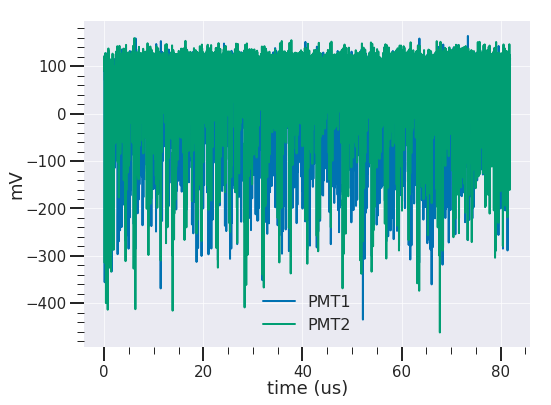

Took 4.790282487869263 seconds for 500 events
Saving now...
Done


In [79]:
import random
import pandas as pd
import time
from scipy.ndimage import gaussian_filter


#the part of the filename before the timestamp. 
#used to distinguish the two oscilloscopes
file_prefixes = ["pmt", "anode"]
dataset = datasets_r2[34]
topdir = datatopdir_r2

#load dataset
nevents = 500 #how many to process
t0 = time.time()
separated_file_lists = get_separated_file_lists(topdir+dataset, file_prefixes, nevents)
print("Separation by prefix took " + str(time.time() - t0))



#which channel do you want?
file_prefix = "pmt" 
t0 = time.time()

zero_amplitude_threshold = 6 #mV, if max-sample is less than this, don't integrate
fit_amplitude_threshold = None
integration_window = [0, 85] #totally encompasing event

wf_output_df = pd.DataFrame()
reduced_output_df = pd.DataFrame()
for i in range(nevents):
    if(i % 10 == 0): print("On event " + str(i) + " of " + str(nevents))
    infile = random.choice(separated_file_lists[file_prefix])
    event_series = pd.Series()
    reduced_series = pd.Series()
    event_series['PMTTimestamp'] = parse_timestamp_from_filename(topdir+dataset+infile) #in milliseconds since 00:00 (midnight)
    
    event_series['PMTSamplingPeriod'] = get_sampling_period_from_file(topdir+dataset+infile) #nanoseconds
    
    #load the file
    d = pd.read_csv(topdir+dataset+infile, header=None, skiprows=20, names=['ts','0','1'], encoding='iso-8859-1')
    event_series['Channels'] = ["pmt1", "pmt2"]
    event_series['ChannelTypes'] = ["pmt", "pmt"]
    data_map = [d['0'].to_numpy(), d['1'].to_numpy()] 
    event_series['Data'] = data_map
    baseline_subtract_2(event_series)
    #calculate amplitude and integral
    #put processed quantities like amplitude and integral in a reduced series
    amplitudes, taus, peakidx, integrals = get_basic_waveform_properties(event_series, fit_amplitude_threshold, integration_window, zero_amplitude_threshold) #finds tau's if relevant

    
    reduced_series['PMT1Amplitude'] = amplitudes[0] #in mV, negative or positive
    reduced_series['PMT2Amplitude'] = amplitudes[1] #in mV, negative or positive
    reduced_series['PMT1Peakidx'] = peakidx[0] #index referencing event_series['Data']
    reduced_series['PMT2Peakidx'] = peakidx[1] #index referencing event_series['Data']
    reduced_series['PMT1Integral'] = integrals[0] #billion electrons
    reduced_series['PMT2Integral'] = integrals[1] #billion electrons
    
    if(integrals[1] > 0.1):
        print(integrals[1])
        print(integrals[0])
        print(event_series['PMTSamplingPeriod'])
        print(np.trapz(event_series['Data'][1], dx=event_series['PMTSamplingPeriod']))
        print(np.sum(event_series['Data'][1])*10)
        print(np.mean(event_series['Data'][1]))
        print(np.median(event_series['Data'][1]))
        ax = plot_pmt_scope(event_series)
        
        plt.show()
        break
    
    reduced_series['GlitchAmplitude'] = None #in mV, negative or positive
    reduced_series['AnodeAmplitude'] = None #in mV, negative or positive
    reduced_series['GlitchTau'] = None #time constant of exponential fit
    reduced_series['AnodeTau'] = None #time constant of exponential fit
    reduced_series['GlitchPeakidx'] = None #index referencing event_series['Data']
    reduced_series['AnodePeakidx'] = None #index referencing event_series['Data']
    reduced_series['GlitchIntegral'] = None #mV*us
    reduced_series['AnodeIntegral'] = None #mV*us
    
    wf_output_df = wf_output_df.append(event_series, ignore_index=True)
    reduced_output_df = reduced_output_df.append(reduced_series, ignore_index=True)
    
print("Took " + str(time.time() - t0) + " seconds for " + str(nevents) + " events")
print("Saving now...")

from pathlib import Path
#if the folders don't exist, create them.
#Path(topdir+dataset+"rawhdf").mkdir(parents=True, exist_ok=True)
#Path(topdir+dataset+"reduced").mkdir(parents=True, exist_ok=True)

wf_output_df.to_hdf("wf_test.h5", key='raw')
reduced_output_df.to_hdf("reduced_test.h5", key='raw')
print("Done")


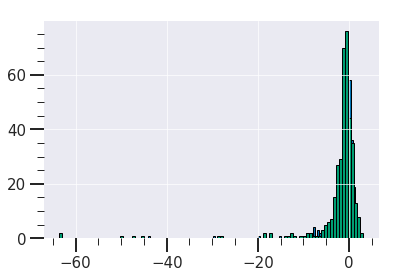

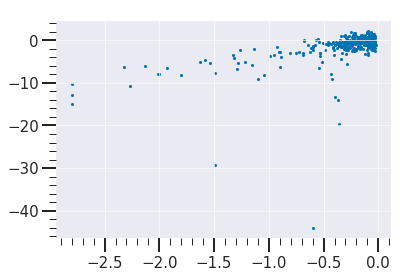

In [36]:
reduced_output_df = pd.read_hdf("/p/lustre1/angelico/hv-test-chamber/Run1/1-29-21/pmt-trig-filling-1800/reduced/1000.h5")
fig, ax = plt.subplots()
ax.hist(reduced_output_df['PMT1Integral'])
ax.hist(reduced_output_df['PMT2Integral'])
plt.show()

fig, ax = plt.subplots()
ax.scatter(reduced_output_df['PMT1Amplitude'], reduced_output_df['PMT1Integral'])
plt.show()

